In [1]:
%matplotlib widget

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [14]:
data = pd.read_csv('real_time_weather.csv')

data.head()

/tmp/ipykernel_16385/7585675.py:1: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('real_time_weather.csv')


,dt_iso,city_name,lat,lon,temp,visibility,dew_point,feels_like,temp_min,temp_max,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2011-12-31T18:00:00,Houston airport,29.9902,-95.3368,295.58,10000.0,291.56,295.92,295.36,295.77,...,NaN,NaN,NaN,NaN,NaN,40,802,Clouds,scattered clouds,03n
1,2011-12-31T19:00:00,Houston airport,29.9902,-95.3368,294.26,10000.0,290.87,294.54,293.92,294.86,...,NaN,NaN,NaN,NaN,NaN,40,802,Clouds,scattered clouds,03n
2,2011-12-31T20:00:00,Houston airport,29.9902,-95.3368,294.05,10000.0,290.67,294.31,293.70,294.86,...,NaN,NaN,NaN,NaN,NaN,75,803,Clouds,broken clouds,04n
3,2011-12-31T21:00:00,Houston airport,29.9902,-95.3368,294.01,10000.0,291.21,294.34,293.44,294.86,...,NaN,NaN,NaN,NaN,NaN,90,804,Clouds,overcast clouds,04n
4,2011-12-31T22:00:00,Houston airport,29.9902,-95.3368,294.07,10000.0,290.69,294.33,293.44,294.86,...,NaN,NaN,NaN,NaN,NaN,90,804,Clouds,overcast clouds,04n


In [15]:
data['dt_iso'] = data['dt_iso'].astype('datetime64')

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96374 entries, 0 to 96373
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   dt_iso               96374 non-null  datetime64[ns]
 1   city_name            96374 non-null  object        
 2   lat                  96374 non-null  float64       
 3   lon                  96374 non-null  float64       
 4   temp                 96374 non-null  float64       
 5   visibility           94368 non-null  float64       
 6   dew_point            96278 non-null  float64       
 7   feels_like           96374 non-null  float64       
 8   temp_min             96374 non-null  float64       
 9   temp_max             96374 non-null  float64       
 10  pressure             96374 non-null  int64         
 11  sea_level            96 non-null     float64       
 12  grnd_level           96 non-null     float64       
 13  humidity             96374 non-

<AxesSubplot:xlabel='dt_iso', ylabel='temp'>

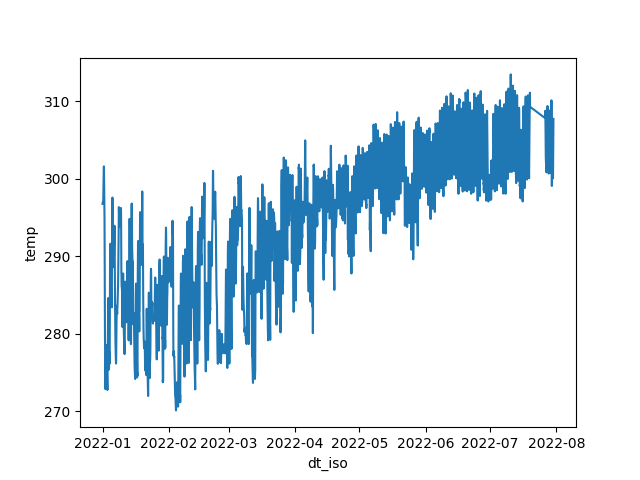

In [17]:
temp = data.loc[data['dt_iso'].dt.year >=2022]

%matplotlib widget

sns.lineplot(data = temp, x='dt_iso', y='temp')

In [18]:
load_data = pd.read_csv('houston_historical_load.csv')

load_data.sample(5)

,dt,reading,mGroupReading
6832,2022-05-08T10:00:00,18740.720,NaN
6453,2022-04-22T15:00:00,13264.070,NaN
3349,2021-12-14T07:00:00,13741.861,NaN
4346,2022-01-24T20:00:00,10895.465,NaN
3262,2021-12-10T16:00:00,13470.403,NaN


In [19]:
load_data['dt'] = load_data['dt'].astype('datetime64')

In [30]:
complete_data = load_data.set_index('dt').join(data.set_index('dt_iso'), how='inner')

complete_data.sample(10)

,reading,mGroupReading,city_name,lat,lon,temp,visibility,dew_point,feels_like,temp_min,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
2022-02-16 23:00:00,10510.6920,NaN,Houston airport,29.9902,-95.3368,293.06,9656.0,292.07,293.56,291.99,...,NaN,0.38,NaN,NaN,NaN,90,701,Mist,mist,50n
2022-02-19 03:00:00,12444.8955,NaN,Houston airport,29.9902,-95.3368,277.78,10000.0,274.28,276.62,276.42,...,NaN,NaN,NaN,NaN,NaN,40,802,Clouds,scattered clouds,03n
2022-03-02 08:00:00,11405.4870,NaN,Houston airport,29.9902,-95.3368,282.63,10000.0,278.43,282.16,281.98,...,NaN,NaN,NaN,NaN,NaN,75,803,Clouds,broken clouds,04d
2021-09-11 22:00:00,11476.3350,NaN,Houston airport,29.9902,-95.3368,298.34,10000.0,292.71,298.77,297.05,...,NaN,NaN,NaN,NaN,NaN,1,800,Clear,sky is clear,01n
2022-06-04 16:00:00,14745.6600,NaN,Houston airport,29.9902,-95.3368,305.49,10000.0,295.29,309.51,303.81,...,NaN,0.14,NaN,NaN,NaN,75,500,Rain,light rain,10d
2022-02-24 10:00:00,14182.1410,NaN,Houston airport,29.9902,-95.3368,277.91,805.0,276.88,276.18,277.11,...,NaN,NaN,NaN,NaN,NaN,90,701,Mist,mist,50d
2022-02-10 15:00:00,11292.9950,NaN,Houston airport,29.9902,-95.3368,295.09,10000.0,275.77,294.07,294.17,...,NaN,NaN,NaN,NaN,NaN,40,802,Clouds,scattered clouds,03d
2022-04-12 02:00:00,12283.6200,NaN,Houston airport,29.9902,-95.3368,296.17,10000.0,293.89,296.80,295.31,...,NaN,NaN,NaN,NaN,NaN,90,804,Clouds,overcast clouds,04n
2022-01-03 03:00:00,14270.3390,NaN,Houston airport,29.9902,-95.3368,273.97,10000.0,269.25,270.56,272.70,...,NaN,NaN,NaN,NaN,NaN,1,800,Clear,sky is clear,01n
2022-06-11 19:00:00,13937.6400,NaN,Houston airport,29.9902,-95.3368,308.22,10000.0,296.56,314.39,306.96,...,NaN,NaN,NaN,NaN,NaN,90,804,Clouds,overcast clouds,04d


In [31]:
complete_data.tail()

,reading,mGroupReading,city_name,lat,lon,temp,visibility,dew_point,feels_like,temp_min,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
2022-07-28 13:00:00,NaN,NaN,Houston airport,29.9902,-95.3368,303.27,10000.0,NaN,306.63,303.27,...,4.47,NaN,NaN,NaN,NaN,7,Clear,clear sky,01d,NaN
2022-07-28 14:00:00,NaN,NaN,Houston airport,29.9902,-95.3368,304.70,10000.0,NaN,308.13,304.70,...,3.84,NaN,NaN,NaN,NaN,13,Clouds,few clouds,02d,NaN
2022-07-28 15:00:00,NaN,NaN,Houston airport,29.9902,-95.3368,304.63,10000.0,NaN,310.79,304.63,...,3.43,NaN,NaN,NaN,NaN,40,Clouds,scattered clouds,03d,NaN
2022-07-28 16:00:00,NaN,NaN,Houston airport,29.9902,-95.3368,305.95,10000.0,NaN,312.16,305.95,...,3.12,NaN,NaN,NaN,NaN,40,Clouds,scattered clouds,03d,NaN
2022-07-28 17:00:00,NaN,NaN,Houston airport,29.9902,-95.3368,307.37,10000.0,NaN,313.88,307.37,...,3.18,NaN,NaN,NaN,NaN,40,Clouds,scattered clouds,03d,NaN


In [33]:
complete_data.reset_index(inplace=True)
complete_data = complete_data.rename({'index':'date'}, axis=1)

In [34]:
complete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8919 entries, 0 to 8918
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 8919 non-null   datetime64[ns]
 1   reading              8906 non-null   float64       
 2   mGroupReading        0 non-null      float64       
 3   city_name            8919 non-null   object        
 4   lat                  8919 non-null   float64       
 5   lon                  8919 non-null   float64       
 6   temp                 8919 non-null   float64       
 7   visibility           8620 non-null   float64       
 8   dew_point            8870 non-null   float64       
 9   feels_like           8919 non-null   float64       
 10  temp_min             8919 non-null   float64       
 11  temp_max             8919 non-null   float64       
 12  pressure             8919 non-null   int64         
 13  sea_level            49 non-null 

In [35]:
learning_data = complete_data[['date','reading','temp']]

learning_data = learning_data.dropna()

,date,reading,temp
0,2021-07-27 18:00:00,14009.1170,305.99
1,2021-07-27 18:00:00,14009.1170,305.99
2,2021-07-27 19:00:00,13292.7420,302.20
3,2021-07-27 20:00:00,12788.2295,300.47
4,2021-07-27 21:00:00,12489.6330,299.39
...,...,...,...
8902,2022-07-28 01:00:00,13177.3200,303.88
8903,2022-07-28 02:00:00,14041.9700,303.08
8904,2022-07-28 03:00:00,15289.9000,302.54
8905,2022-07-28 04:00:00,16510.3600,302.14


In [67]:
learning_data['Weekend'] = np.where((learning_data['date'].dt.dayofweek == 5) | (learning_data['date'].dt.dayofweek == 6), 1, 0)

learning_data.sample(5)

,date,reading,temp,Weekend,temp2,temp3,temp_weekend,temp2_weekend,temp3_weekend,Month_1,...,Month_7,Month_8,Month_9,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6
6899,2022-04-29 16:00:00,13355.920,302.61,0,91572.8121,2.771085e+07,0.00,0.0000,0.000000e+00,0,...,0,0,0,0,0,0,0,1,0,0
5610,2022-03-09 01:00:00,13364.592,279.59,0,78170.5681,2.185571e+07,0.00,0.0000,0.000000e+00,0,...,0,0,0,0,0,1,0,0,0,0
2250,2021-10-25 23:00:00,12395.866,297.81,0,88690.7961,2.641301e+07,0.00,0.0000,0.000000e+00,0,...,0,0,0,1,0,0,0,0,0,0
8825,2022-07-17 22:00:00,12866.510,303.95,1,92385.6025,2.808060e+07,303.95,92385.6025,2.808060e+07,0,...,1,0,0,0,0,0,0,0,0,1
5827,2022-03-17 20:00:00,10237.509,292.44,0,85521.1536,2.500981e+07,0.00,0.0000,0.000000e+00,0,...,0,0,0,0,0,0,1,0,0,0


<AxesSubplot:xlabel='temp', ylabel='reading'>

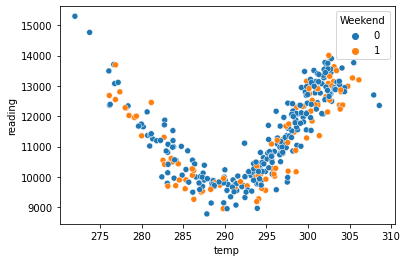

In [68]:
%matplotlib inline
temp_data = learning_data.loc[learning_data['date'].dt.hour == 22]
sns.scatterplot(data = temp_data, x='temp',y='reading', hue='Weekend')

In [69]:
# Let's add polynomial values for temp
learning_data['temp2'] = learning_data.loc[:,'temp'].apply(lambda x: x**2)
# learning_data['temp3'] = learning_data.loc[:,'temp'].apply(lambda x: x**3)
learning_data['temp_weekend'] = learning_data.loc[:,('temp', 'Weekend')].apply(lambda x: x['temp'] * x['Weekend'], axis=1)
learning_data['temp2_weekend'] = learning_data.loc[:,('temp2', 'Weekend')].apply(lambda x: x['temp2'] * x['Weekend'], axis=1)
# learning_data['temp3_weekend'] = learning_data.loc[:,('temp3', 'Weekend')].apply(lambda x: x['temp3'] * x['Weekend'], axis=1)

In [70]:
learning_data['Month'] = learning_data['date'].dt.month
learning_data['DOW'] = learning_data['date'].dt.dayofweek

ohe_values = pd.get_dummies(learning_data[['Month','DOW']].astype(str))
t_d = learning_data.drop(['Month','DOW'], axis=1)
learning_data = pd.concat((t_d, ohe_values), axis=1)

learning_data.sample(5)

,date,reading,temp,Weekend,temp2,temp3,temp_weekend,temp2_weekend,temp3_weekend,Month_1,...,Month_7,Month_8,Month_9,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6
7784,2022-06-04 19:00:00,12708.210,301.92,1,91155.6864,2.752172e+07,301.92,91155.6864,2.752172e+07,0,...,0,0,0,0,0,0,0,0,1,0
6854,2022-04-27 19:00:00,10238.940,298.65,0,89191.8225,2.663714e+07,0.00,0.0000,0.000000e+00,0,...,0,0,0,0,0,1,0,0,0,0
172,2021-08-03 20:00:00,12970.680,304.07,0,92458.5649,2.811388e+07,0.00,0.0000,0.000000e+00,0,...,0,1,0,0,1,0,0,0,0,0
1891,2021-10-11 10:00:00,17128.281,296.08,0,87663.3664,2.595537e+07,0.00,0.0000,0.000000e+00,0,...,0,0,0,1,0,0,0,0,0,0
2220,2021-10-24 17:00:00,12903.383,303.01,1,91815.0601,2.782088e+07,303.01,91815.0601,2.782088e+07,0,...,0,0,0,0,0,0,0,0,0,1


In [71]:
learning_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8906 entries, 0 to 8906
Data columns (total 47 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           8906 non-null   datetime64[ns]
 1   reading        8906 non-null   float64       
 2   temp           8906 non-null   float64       
 3   Weekend        8906 non-null   int64         
 4   temp2          8906 non-null   float64       
 5   temp3          8906 non-null   float64       
 6   temp_weekend   8906 non-null   float64       
 7   temp2_weekend  8906 non-null   float64       
 8   temp3_weekend  8906 non-null   float64       
 9   Month_1        8906 non-null   uint8         
 10  Month_10       8906 non-null   uint8         
 11  Month_11       8906 non-null   uint8         
 12  Month_12       8906 non-null   uint8         
 13  Month_2        8906 non-null   uint8         
 14  Month_3        8906 non-null   uint8         
 15  Month_4        8906 n

In [72]:
learning_data.dropna(inplace=True)

In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

models = []
output_data = pd.DataFrame(columns=['prediction','actual','date'])
predictions = pd.Series(dtype='float')
actuals = pd.Series(dtype='float')
dates = pd.Series(dtype='datetime64[ns]')

for i, hour in enumerate(range(24)):
    model = LinearRegression(fit_intercept = False)
    d = learning_data.loc[learning_data['date'].dt.hour == hour]
    x_data = d.drop(['reading'], axis=1)
    y_data = d['reading']
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, random_state=1, shuffle=False, test_size=10)
    model.fit(x_train.drop(['date'], axis=1), y_train)
    
    # Predictions
    pred = pd.Series(model.predict(x_test.drop(['date'], axis=1)).reshape((-1)), index=y_test.index)
    predictions = pd.concat((predictions, pred), axis=0)
    actuals = pd.concat((actuals, y_test), axis=0)
    temp_dates = x_test['date']
    dates = pd.concat((dates, temp_dates), axis=0)
    models.append(model)
    
output_data['date'] = dates
output_data['actual'] = actuals
output_data['prediction'] = predictions
output_data = output_data.sort_index()

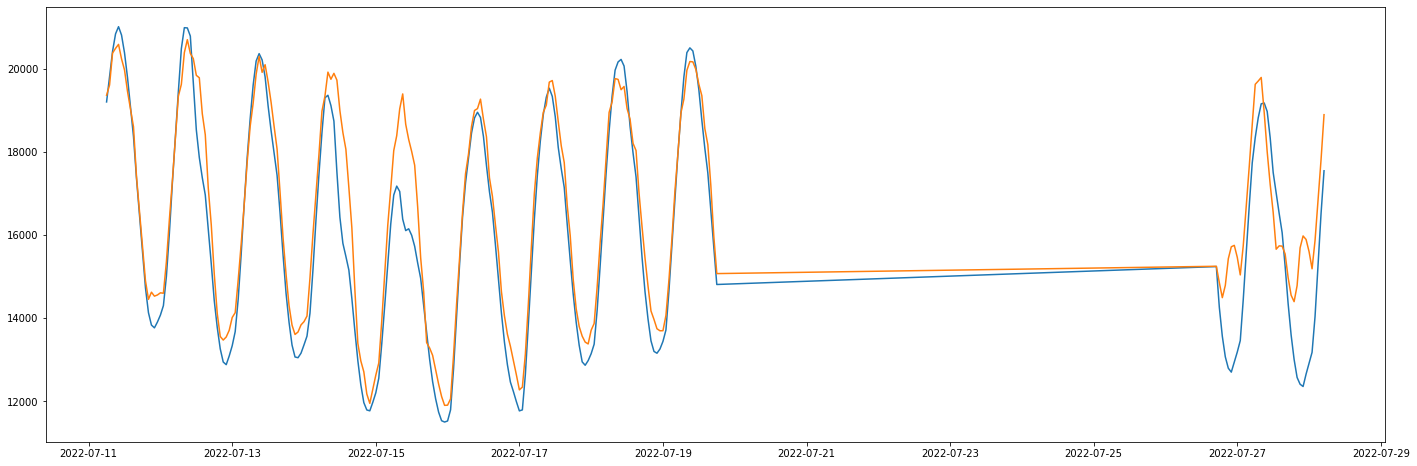

In [108]:
fig = plt.figure(figsize=(24,8))
plt.plot(output_data['date'], output_data['actual'])
plt.plot(output_data['date'], output_data['prediction'])

In [106]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error
r2_score(output_data['actual'], output_data['prediction']), mean_absolute_percentage_error(output_data['actual'],output_data['prediction'])

(0.859056624882061, 0.04877612568787139)